# Generating figures explaining relational games

## Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils

import scipy
import matplotlib.pyplot as plt
# import seaborn as sns
# import scienceplots

fsize = 7
tsize = 7
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
# plt.style.use('grid')
# plt.style.use('default')
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar='ci', errwidth=1.25, capsize=0.05,)

save_dir = 'figs/'

2023-09-13 13:24:20.100759: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-13 13:24:20.153710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 13:24:21.596427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_path = '../../data/relational_games'

In [3]:
def load_task_sample(filename, sample_size):
    with np.load(filename) as data:
        imgs = data['images']
        labels = data['labels']

    obj_seqs = data_utils.get_obj_seq(imgs)
    labels = np.squeeze(labels)

    sample = np.random.choice(len(imgs), sample_size, replace=False)

    imgs_sample, obj_seqs_sample, labels_sample = imgs[sample], obj_seqs[sample], labels[sample]
    del imgs, obj_seqs, labels, data
    return imgs_sample, obj_seqs_sample, labels_sample

In [4]:
def plot_sample(obj_seq, label, figsize=(5,5)):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=figsize)
    for j, ax in enumerate(axs.flatten()):
        ax.imshow(obj_seq[j])
        ax.axis('off')
        ax.set_title(f'object {j}')

    print(f'label: {bool(label)}')

## Objects in each split

In [5]:
def create_split_img(sample_objs):
    row1 = np.concatenate(sample_objs[:3], axis=1)
    row2 = np.concatenate(sample_objs[3:6], axis=1)
    split_img = np.concatenate([row1, row2], axis=0)
    return split_img

def get_sample_objs(split):
    filename = f'{data_path}/occurs_{split}.npz'
    imgs, obj_seqs, labels = load_task_sample(filename, sample_size=6)
    sample_objs = obj_seqs[:, 1]
    return sample_objs

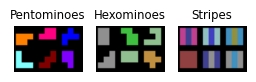

In [6]:
splits = ('pentos', 'hexos', 'stripes')
fig, axs = plt.subplots(ncols=len(splits), figsize=(3,2))
split_name_map = {'pentos': 'Pentominoes', 'hexos': 'Hexominoes', 'stripes': 'Stripes'}
for ax, split in zip(axs, splits):
    split_objs = get_sample_objs(split)
    split_img = create_split_img(split_objs)
    ax.imshow(split_img)
    ax.axis('off')
    ax.set_title(split_name_map[split])

In [7]:
fig.set_tight_layout(True)
fig.savefig('figs/relational_games_objects.pdf')

## Task Examples

In [8]:
def sample_task_instance(task, split='hexos'):
    filename = f'{data_path}/{task}_{split}.npz'
    imgs, obj_seqs, labels = load_task_sample(filename, sample_size=6)
    pos_sample = np.random.choice(np.where(labels==1)[0])
    neg_sample = np.random.choice(np.where(labels==0)[0])
    return imgs[pos_sample], imgs[neg_sample]

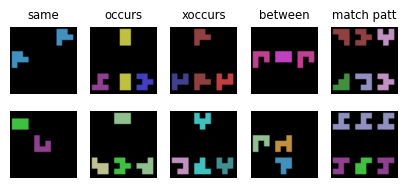

In [9]:
tasks = ('same', 'occurs', 'xoccurs', '1task_between', '1task_match_patt')
task_rename = {'1task_between': 'between', '1task_match_patt': 'match patt'}
fig, axs = plt.subplots(nrows=2, ncols=len(tasks), figsize=(5, 2))
for i, task in enumerate(tasks):
    pos_img, neg_img = sample_task_instance(task)
    axs[0][i].imshow(pos_img)
    axs[1][i].imshow(neg_img)

    axs[0][i].axis('off')
    axs[1][i].axis('off')

    axs[0][i].set_title(task_rename.get(task, task))

In [10]:
fig.set_tight_layout(True)
fig.savefig('figs/relational_games_tasks.pdf')